<h1><center>A Zebra Gorda!!!</center></h1>

<figure> &emsp;




<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ9sOVN0F6tymxXYtWGyvxaFJpzBBLr_2QhPNyf4UGBZ5VbU68I" width="250" height="250"
 />


</figure>



<div id="Tópico 0">
    <div >
        <h><a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/"><h2>Prof. Marcelino Monteiro de Andrade Dr.</h2></a></h>   
</div> </div>



Um pouco uma análise exploratória das zebras, em especial, na Universidade de Brasília

Observação: dados coletados da base Portal da Trasparência. Contudo, resultados não auditados e passíveis de erros

Figura:https://www.amazon.com/generic-personalized-zebra-mouse-pad/dp/b00xmsmzs2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

1) Lendo Bases de Dados

In [ ]:
df_rem = pd.read_csv('/home/mrclnndrd/Dropbox/UnB/Gama/Arquivo/Zebra Gorda/201908_Remuneracao.csv', 
                         encoding='cp1252')

In [ ]:
df_cad = pd.read_csv('/home/mrclnndrd/Dropbox/UnB/Gama/Arquivo/Zebra Gorda/201908_Cadastro.csv',
                     encoding='latin-1', header=None, sep='\n')

2) Extraindo dados do cadastro

In [ ]:
servidor=[]
matricula=[]
CPF=[]
unidade=[]
cargo=[]
nivel=[]
lotado=[]
for i in range(len(df_cad)):
        servidor.append(df_cad.iloc[i][0].split(';')[1][1:-1])
        CPF.append(df_cad.iloc[i][0].split(';')[2][1:-1])
        unidade.append(df_cad.iloc[i][0].split(';')[24][1:-1])
        cargo.append(df_cad.iloc[i][0].split(";")[4][1:-1])
        nivel.append(df_cad.iloc[i][0].split(";")[8][1:-1])
        lotado.append(df_cad.iloc[i][0].split(';')[16][1:-1])
print(i)
data_cad=pd.DataFrame([servidor,CPF,unidade,cargo,nivel,lotado])
data_cad.to_pickle("./data_cad.pkl")

3) Extraindo dados de remuneração

In [ ]:
servidor=[]
matricula=[]
CPF=[]
remunera=[]
for i in range(len(df_rem)):
    servidor.append(str(df_rem.iloc[i]).split(";")[42][1:-1])
    CPF.append(str(df_rem.iloc[i]).split(";")[41][1:-1])
    remunera.append(str(df_rem.iloc[i]).split(";")[43][1:-1])
print(i)
data_rem=pd.DataFrame([servidor,CPF,remunera])
data_rem.to_pickle("./data_rem.pkl")

4) Concebendo DataFrames de Cadastro e Remuneração

In [2]:
data_cad = pd.read_pickle("./data_cad.pkl")
data_cad=data_cad.transpose()
data_cad.columns=list(data_cad.iloc[0])
data_cad.drop(data_cad.index[0],inplace=True)
data_cad['ID']=data_cad['NOME']+data_cad['CPF']
#data_cad.head()

In [3]:
data_rem = pd.read_pickle("./data_rem.pkl")
data_rem=data_rem.transpose()
data_rem.columns=['NOME','CPF','REMUNERA']
data_rem['ID']=data_rem['NOME']+data_rem['CPF']
#data_rem.head()

5) Avaliando Duplicatas

In [ ]:
#data_rem['ID'].value_counts()[:10]

In [ ]:
#data_cad['ID'].value_counts()[:10]

6) Eliminando Duplicatas

In [4]:
data_cad=data_cad[data_cad['NIVEL_CARGO']!='-1']

In [5]:
data_cad=data_cad.drop_duplicates(subset='ID', keep='first')#['ID'].value_counts()[:100]

In [ ]:
#data_cad['ID'].value_counts()[:10]

In [ ]:
print(len(data_cad),len(data_rem))

7) Reunindo DataFrames

In [6]:
data_cad=data_cad.set_index('ID')
data_rem=data_rem.set_index('ID')

#display(data_cad.head())
#display(data_rem.head())

In [7]:
data= pd.concat([data_cad[['ORG_EXERCICIO','NIVEL_CARGO','DESCRICAO_CARGO','UORG_LOTACAO']], data_rem['REMUNERA']], axis=1, sort=False)
data_cad.index[0]==data_rem.index[0]


True

8) Tratando dados

In [8]:
data.dtypes.value_counts()

object    5
dtype: int64

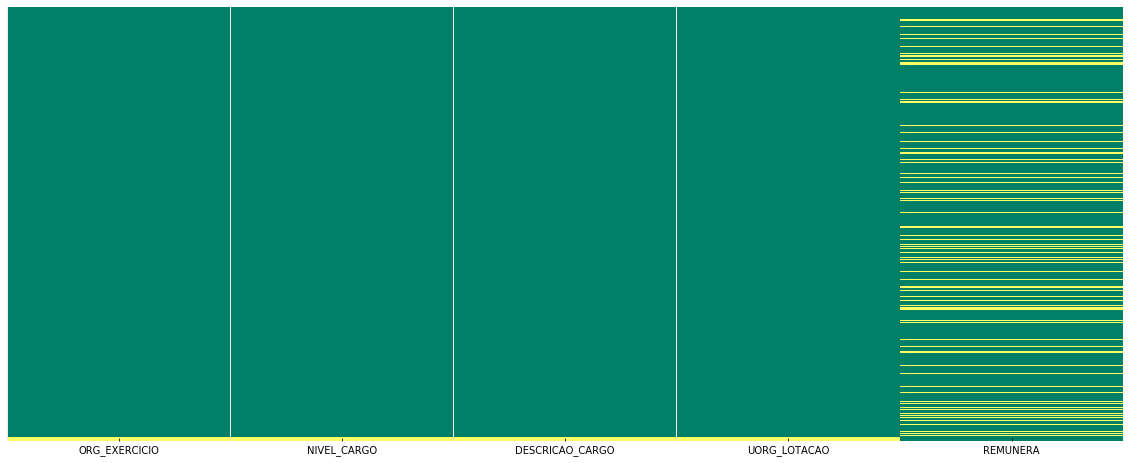

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [10]:
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x,
                        y = y,
                        mode = 'markers',
                        marker = dict(color = y, size=size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)
missing_columns = len(data) - data.loc[:, np.sum(data.isnull())>0].count()
x = missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, 'Features Having Missing Observations','Missing Values', 20, 'Viridis')

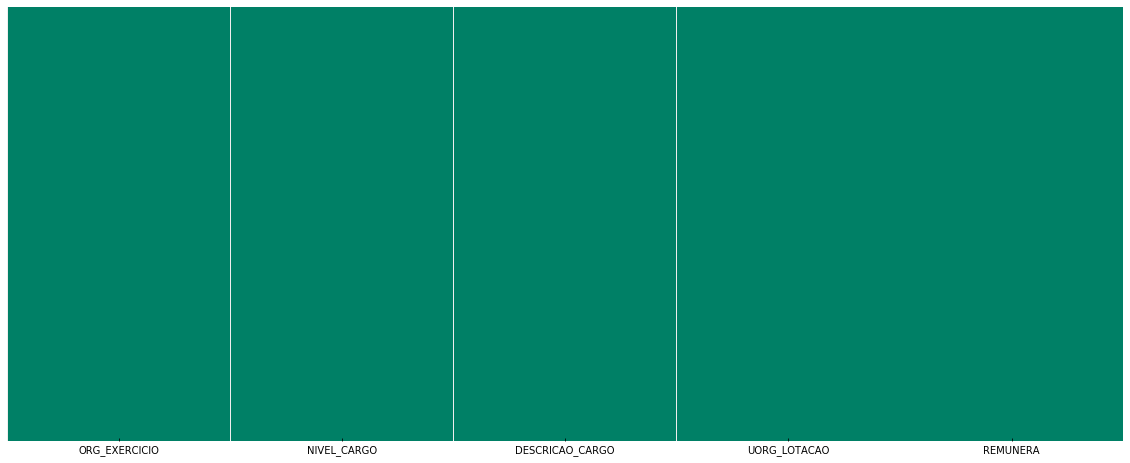

In [11]:
data=data.dropna()
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [12]:
rem=[float(data['REMUNERA'].values[i].split(', ')[0]+'.'+data['REMUNERA'].values[i].split(', ')[1]) for i in range(len(data))]
data['REMUNERA']=rem

9) Class UnB e dados com remuneração acima de 1000 Reais

In [ ]:
#data[data['ORG_EXERCICIO']=='Fundação Universidade de Brasília'].sort_values(by='REMUNERA', ascending=False).head()

In [13]:
data=data[data['REMUNERA']>1000].sort_values(by='REMUNERA', ascending=False)
#data.tail()

In [14]:
data['CLASS']='Outros'
data['CLASS'].iloc[np.where(data['ORG_EXERCICIO']=='Fundação Universidade de Brasília')]='UnB'
#data.head()

/home/mrclnndrd/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



10) Seleção de Unidades com mais de 500 servidores lotados

In [15]:
org=data.groupby('ORG_EXERCICIO').count().sort_values(by='REMUNERA', ascending=True)['CLASS'].keys()
org500=org[np.where(data.groupby('ORG_EXERCICIO').count().sort_values(by='REMUNERA', ascending=True)['CLASS'].values>500)]
print(len(org),len(org500))
data500=data[data['ORG_EXERCICIO'].isin(org500)]


323 151


11) Comparação UnB e outras Unidades

[Text(0,0.5,'Remuneração Média'),
 Text(0.5,0,'Unidades'),
 Text(0.5,1,'UnB e Outras Unidades')]

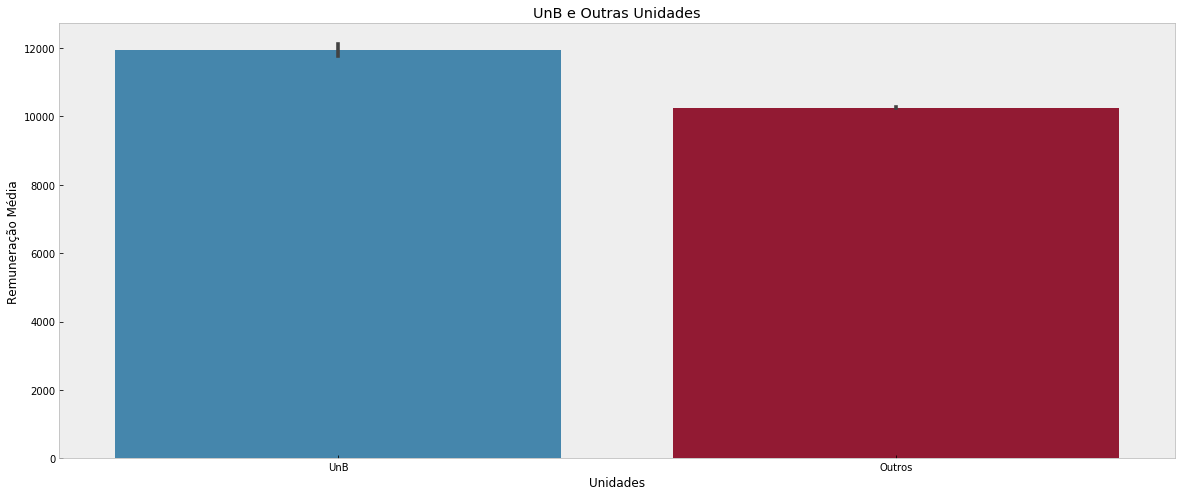

In [16]:
plt.figure(figsize=(20,8))
barplot = sns.barplot(x = "CLASS", y = "REMUNERA", data = data500, order = ["UnB", "Outros", ])
barplot.set(xlabel = "Unidades", ylabel = "Remuneração Média", title = "UnB e Outras Unidades")

Text(0.5,0,'Remuneração')

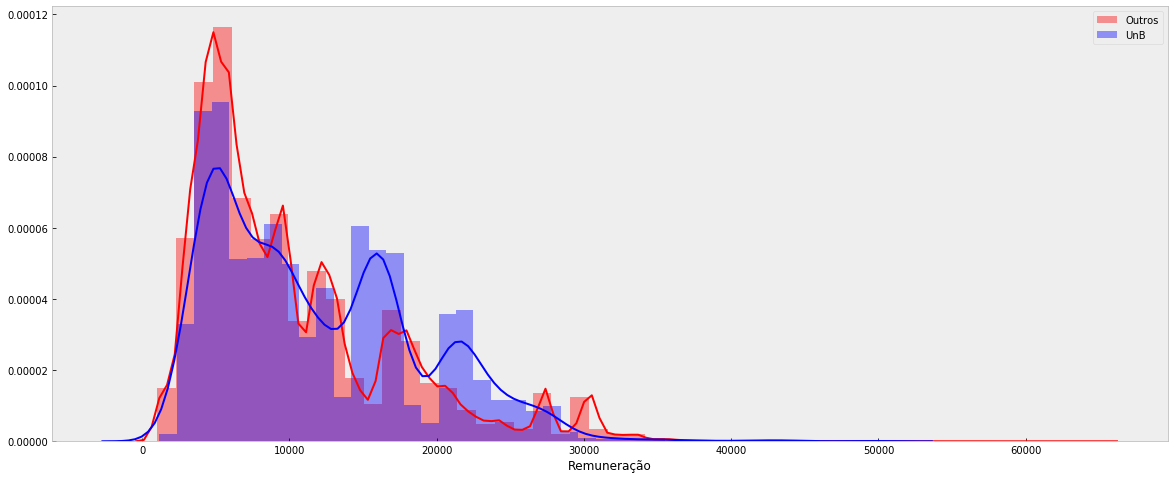

In [17]:
plt.figure(figsize=(20,8))
sns.distplot( data500[data500['CLASS']!='UnB']['REMUNERA'].values , color="red", label="Outros")
sns.distplot( data500[data500['CLASS']=='UnB']['REMUNERA'].values , color="blue", label="UnB")
plt.legend()
plt.xlabel('Remuneração') 

In [18]:
df=data500.groupby('ORG_EXERCICIO').mean().sort_values(by='REMUNERA', ascending=False).reset_index()
scatter_plot(df[df.columns[0]], df[df.columns[1]], title, 'Unidades do Executivo','Remuneração Média', 5, 'Viridis')

In [19]:
print('Foram avaliadas ' + str(len(data500['ORG_EXERCICIO'].unique()))+' Unidades')

Foram avaliadas 151 Unidades


12) Comparação UnB e outras Universidades

In [20]:
univ=['Universidade' in data500['ORG_EXERCICIO'][i] for i in range(len(data500))]
data500univ=data500.iloc[univ]

[Text(0,0.5,'Remuneração Média'),
 Text(0.5,0,'Unidades'),
 Text(0.5,1,'UnB e Outras Universidades')]

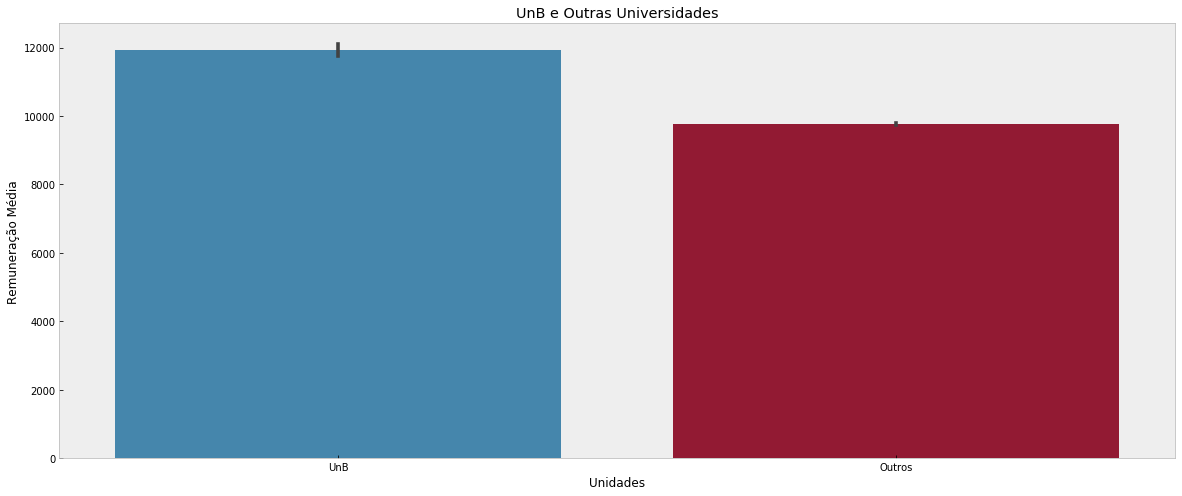

In [22]:
plt.figure(figsize=(20,8))
barplot = sns.barplot(x = "CLASS", y = "REMUNERA", data = data500univ, order = ["UnB", "Outros", ])
barplot.set(xlabel = "Unidades", ylabel = "Remuneração Média", title = "UnB e Outras Universidades")

Text(0.5,0,'Remuneração')

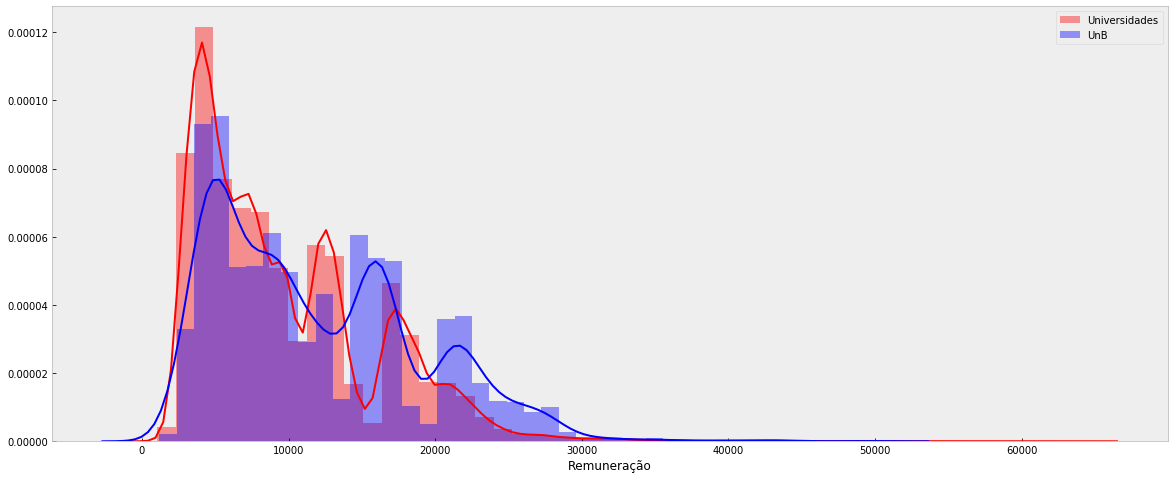

In [23]:
plt.figure(figsize=(20,8))
sns.distplot( data500univ[data500univ['CLASS']!='UnB']['REMUNERA'].values , color="red", label="Universidades")
sns.distplot( data500univ[data500univ['CLASS']=='UnB']['REMUNERA'].values , color="blue", label="UnB")
plt.legend()
plt.xlabel('Remuneração') 


In [24]:
df=data500univ.groupby('ORG_EXERCICIO').mean().sort_values(by='REMUNERA', ascending=False).reset_index()
scatter_plot(df[df.columns[0]], df[df.columns[1]], 'Remuneração Média Universidades', 'Unidades do Executivo','Remuneração Média', 5, 'Viridis')

In [25]:
print('Foram avaliadas ' + str(len(data500univ['ORG_EXERCICIO'].unique()))+' Universidades')
print('As Universidades representam '+ 
      str(round(100*data500univ['REMUNERA'].sum()/data500['REMUNERA'].sum(),2)) + ' % do valor Bruto da Folha')
print('Universo de '+ 
      str(len(data500)) + ' funcionários sendo '+str(len(data500univ)) +' trabalhando em Universidades')

Foram avaliadas 62 Universidades
As Universidades representam 36.76 % do valor Bruto da Folha
Universo de 512006 funcionários sendo 196819 trabalhando em Universidades


FIM!! Pode dar ZEBRA!!!